<a href="https://colab.research.google.com/github/Yi-Wei-Lin/Tibame_ML_20210602/blob/main/cifar10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [51]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [52]:
names = ["ariplane",
      "automobile",
      "bird",
      "cat",
      "deer",
      "dog",
      "frog",
      "horse",
      "ship",
      "truck"
      ]

automobile


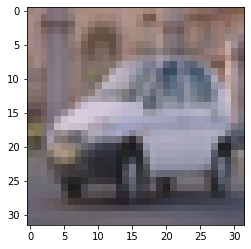

In [53]:
# mnist: (60000, ) [5,2,1,0]
import matplotlib.pyplot as plt
import random
idx = random.randint(0,49999)
ans = y_train[idx][0]
print(names[ans])
plt.imshow(x_train[idx])

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
layers = [
  # 3 * 3 * 3(一個) * 64 + 64(bias) = 1792
  Conv2D(64,3, activation="relu", padding="same", input_shape=(32,32,3)),
  MaxPooling2D(),
  # 3 * 3 * 64(一個) * 128 + 128(bias) =  73856
  Conv2D(128,3, activation="relu", padding="same"),
  MaxPooling2D(),
  Conv2D(256,3, activation="relu", padding="same"),
  MaxPooling2D(),
  Conv2D(512,3, activation="relu", padding="same"),
  MaxPooling2D(),
  Conv2D(512,3, activation="relu", padding="same"),
  MaxPooling2D(),
  Flatten(),
  Dense(256, activation="relu"),
  # 128 * 10 + 10(bias) = 1290
  Dropout(0.25),
  Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 4, 4, 512)        

In [55]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
        optimizer=Adam(),
        metrics=["accuracy"])

In [56]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [57]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# validation_split : 切出一些驗證資料來做驗證(0.1:54000筆資料訓練)
# epochs: 看幾輪(10輪: 54000 * 10)
# batch_size: 看了多少筆再做一次梯度調整(看圖片大小, 圖片小:200, 圖片大:20)
# 200batch, 10epochs: 54000 * 10 / 200 -> 2700次(梯度調整)
# verbose: 0(無聲) 1(最詳細) 2(沒有進度條)
callback = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("cnn.h5", save_best_only=True)
]
model.fit(x_train_norm,
      y_train,
      validation_split=0.1,
      epochs=30,
      batch_size=200,
      verbose=2,
      callbacks=callback)

Epoch 1/30
225/225 - 6s - loss: 1.6832 - accuracy: 0.3694 - val_loss: 1.3182 - val_accuracy: 0.5076
Epoch 2/30
225/225 - 5s - loss: 1.1791 - accuracy: 0.5733 - val_loss: 1.0039 - val_accuracy: 0.6352
Epoch 3/30
225/225 - 5s - loss: 0.9399 - accuracy: 0.6683 - val_loss: 0.8590 - val_accuracy: 0.6982
Epoch 4/30
225/225 - 5s - loss: 0.7606 - accuracy: 0.7341 - val_loss: 0.7660 - val_accuracy: 0.7362
Epoch 5/30
225/225 - 6s - loss: 0.6237 - accuracy: 0.7839 - val_loss: 0.7116 - val_accuracy: 0.7568
Epoch 6/30
225/225 - 5s - loss: 0.4968 - accuracy: 0.8287 - val_loss: 0.7176 - val_accuracy: 0.7632
Epoch 7/30
225/225 - 6s - loss: 0.3921 - accuracy: 0.8644 - val_loss: 0.7256 - val_accuracy: 0.7592
Epoch 8/30
225/225 - 6s - loss: 0.2918 - accuracy: 0.8982 - val_loss: 0.8211 - val_accuracy: 0.7656
Epoch 9/30
225/225 - 6s - loss: 0.2284 - accuracy: 0.9212 - val_loss: 0.8196 - val_accuracy: 0.7706
Epoch 10/30
225/225 - 6s - loss: 0.1640 - accuracy: 0.9420 - val_loss: 0.8836 - val_accuracy: 0.7706

In [58]:
model.evaluate(x_test_norm, y_test) # 測試資料預測

313/313 [==============================] - 1s 4ms/step - loss: 0.7464 - accuracy: 0.7419


[0.7463573217391968, 0.7419000267982483]

In [59]:
print(y_test.shape)
print(pre.shape)
# -1:叫他幫你算 10000*1 = -1(?)
y_test_r = y_test.reshape(-1)
print(y_test_r.shape)

(10000, 1)
(10000,)
(10000,)


In [60]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# predict_proba -> predict
# predict -> predict_classes
# model.predict(x_test_norm)
pre = model.predict_classes(x_test_norm)
# 只要在 tensorflow: 就帶 one-hot -> y_test_cat
# 不在: 帶原本 -> y_test
mat = confusion_matrix(y_test_r, pre)
pd.DataFrame(mat,
      columns=["{}(預測)".format(names[i]) for i in range(10)],
      index=["{}(正確)".format(names[i]) for i in range(10)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,ariplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
ariplane(正確),780,13,42,14,16,3,4,13,70,45
automobile(正確),18,787,0,6,2,8,6,6,15,152
bird(正確),57,3,645,53,100,46,31,33,18,14
cat(正確),14,6,75,571,56,144,37,50,18,29
deer(正確),12,1,58,60,708,36,26,85,10,4
dog(正確),13,1,41,189,43,607,9,79,11,7
frog(正確),5,3,63,103,48,20,729,6,14,9
horse(正確),13,0,21,21,52,37,1,840,3,12
ship(正確),39,15,10,11,5,6,0,5,871,38
truck(正確),31,30,6,11,0,5,4,11,21,881


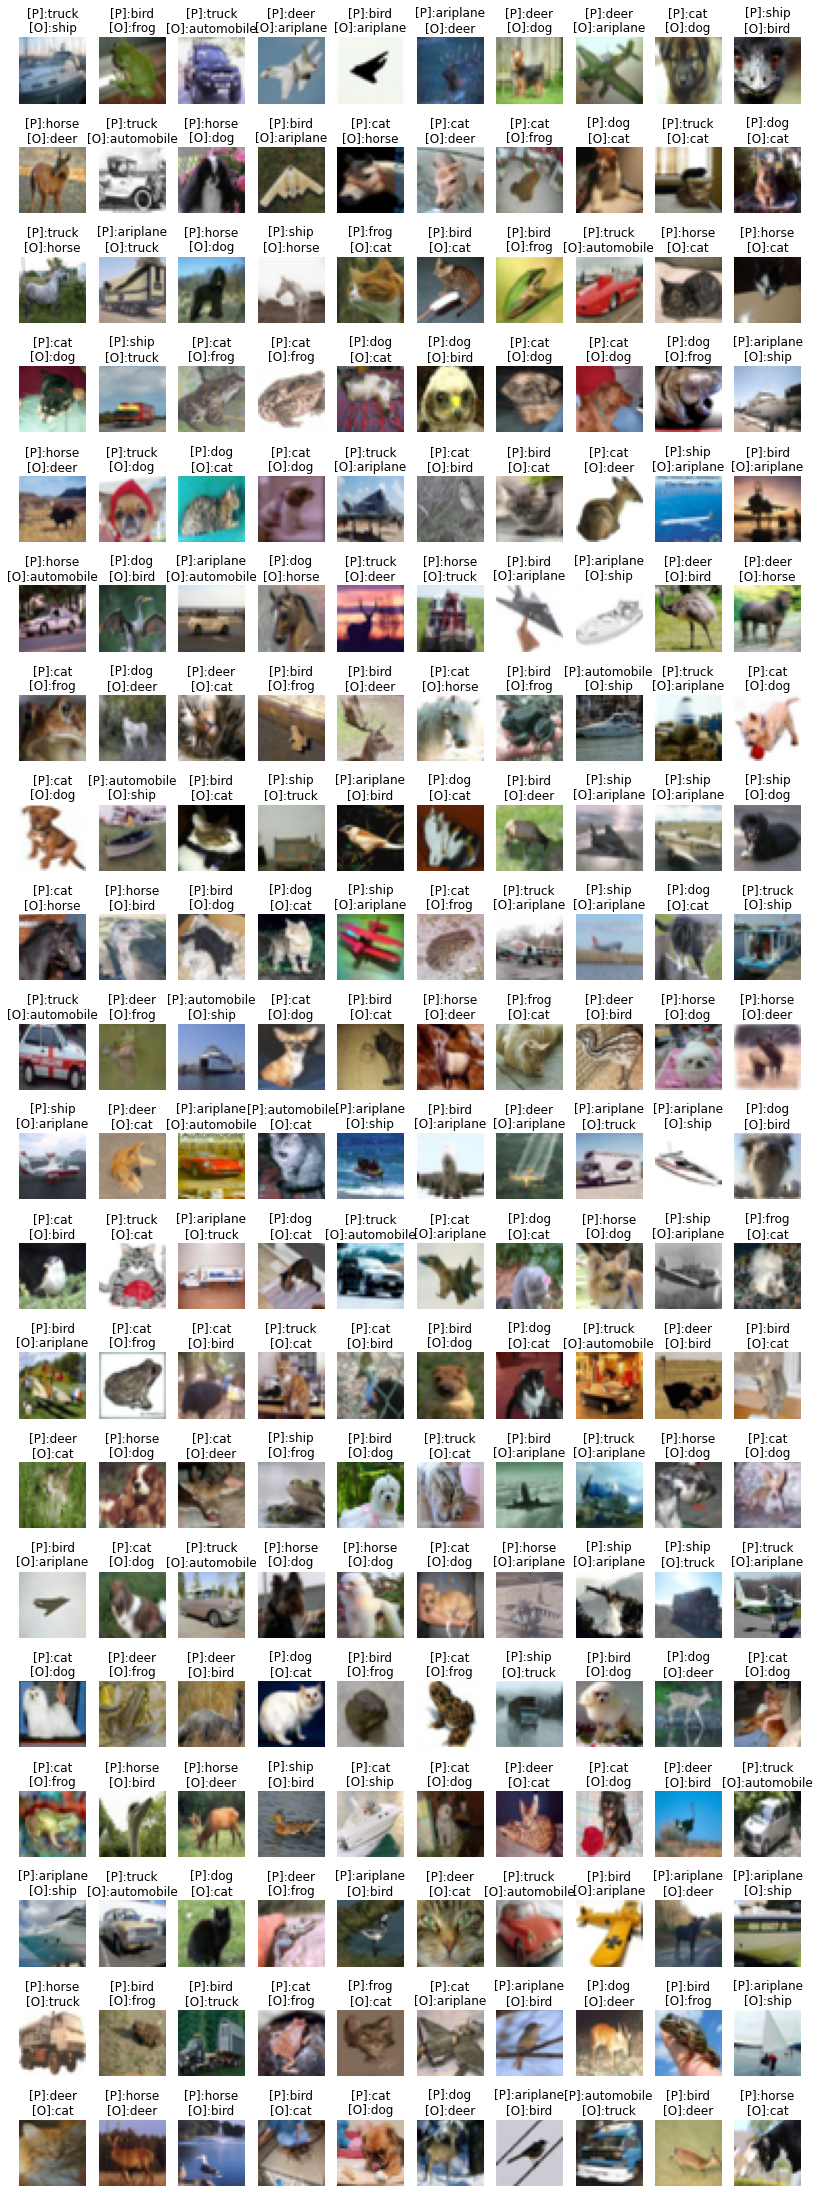

In [61]:
import numpy as np
import matplotlib.pyplot as plt
np.nonzero([[0,2,0],  # 判斷第幾個list,第幾個位置zero
      [0,0,3]])
idx = np.nonzero(pre != y_test_r)[0]
idx = idx[:200]
false_pre = pre[idx]
false_label = y_test_r[idx]
false_img = x_test[idx]

plt.figure(figsize=(14,42))
width = 10
height= len(idx) // width + 1
for i in range(len(false_img)):
  plt.subplot(height, width, i+1)
  title = "[P]:{}\n[O]:{}".format(names[false_pre[i]], names[false_label[i]])
  plt.title(title)
  plt.axis("off")
  plt.imshow(false_img[i])

輸入網址:https://images.chinatimes.com/newsphoto/2020-07-04/656/20200704002959.jpg


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


ariplane 的機率 0.002
automobile 的機率 0.0
bird 的機率 0.504
cat 的機率 0.015
deer 的機率 0.008
dog 的機率 0.437
frog 的機率 0.001
horse 的機率 0.033
ship 的機率 0.0
truck 的機率 0.0


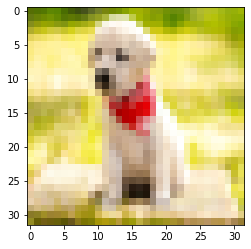

In [63]:
import requests
from PIL import Image
url = input("輸入網址:")
response = requests.get(url, verify=False, stream=True)
img = Image.open(response.raw)
img = img.resize((32,32)).convert("RGB")
img_np = np.array(img)
img_norm = np.array([img_np]) / 255
pre = model.predict(img_norm)[0]
for n,p in zip(names, pre):
  print(n, "的機率", round(p,3))
plt.imshow(img)
